In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\fatma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv('Data/final_data_ar.csv', index_col='id', encoding ='utf-8-sig')
data.head()

,Unnamed: 0,tweetcreatedts,arabic_text,arabic_class,arabic_location
id,,,,,
1039,9604,2021-02-08 19:07:40+00:00,RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد...,القلق,شارع نيشن وود
1682,1682,2021-02-03 23:58:40+00:00,تضمين التغريدة أنا فقط بحاجة إلى 320! شكرا على...,وحيد,RH في انتظار تحديث الكوكب
5275,5275,2021-01-27 23:57:59+00:00,SAD_istfied سأبكي / نقاط البيع,ضغط عصبى,أي ضمائر ¡GMT + 8
6069,6069,2021-02-03 23:58:23+00:00,RTJoshOfficial___: أحتاج إلى رفيق اللعنة الثابت,القلق,........
6087,6087,2021-02-12 20:27:58+00:00,RTmikegolicjr: سعيد لأننا نتحدث أخيرًا عن Desh...,عادي,سانت لويس ، ميزوري


In [3]:
data = data.drop(data.columns[0], axis=1)
data

,tweetcreatedts,arabic_text,arabic_class,arabic_location
id,,,,
1039,2021-02-08 19:07:40+00:00,RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد...,القلق,شارع نيشن وود
1682,2021-02-03 23:58:40+00:00,تضمين التغريدة أنا فقط بحاجة إلى 320! شكرا على...,وحيد,RH في انتظار تحديث الكوكب
5275,2021-01-27 23:57:59+00:00,SAD_istfied سأبكي / نقاط البيع,ضغط عصبى,أي ضمائر ¡GMT + 8
6069,2021-02-03 23:58:23+00:00,RTJoshOfficial___: أحتاج إلى رفيق اللعنة الثابت,القلق,........
6087,2021-02-12 20:27:58+00:00,RTmikegolicjr: سعيد لأننا نتحدث أخيرًا عن Desh...,عادي,سانت لويس ، ميزوري
...,...,...,...,...
7813,2021-01-27 23:58:57+00:00,أنا متوتر الرماد لأطير من خلاله,القلق,شارلوت، نك
1305,2021-02-03 23:58:58+00:00,64E7B6DA: معرف المعركة\nأحتاج نسخة احتياطية!\n...,وحيد,في
5192,2021-02-03 23:59:01+00:00,الكثير من المرح ثلج الكتابة عن أيام الثلج لدين...,القلق,دويلستاون ، بنسلفانيا


In [4]:
#find duplicate rows across all columns
print('Number of the duplicated rows= ',data.duplicated().sum())

# summary of the number of nulls
print('Total missing values = ', data.isna().sum().sum())

print('Number of nulls in each column:')
data.isna().sum()
print('________________________________________________________________')

# count the ratio of missing values
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Number of the duplicated rows=  7883
Total missing values =  15
Number of nulls in each column:


tweetcreatedts      0
arabic_text         0
arabic_class        0
arabic_location    15
dtype: int64

________________________________________________________________


,Total missing,% missing
arabic_location,15,0.037721
tweetcreatedts,0,0.000000
arabic_text,0,0.000000
arabic_class,0,0.000000


In [5]:
data['arabic_class'].value_counts()

القلق       12585
عادي        10022
ضغط عصبى     8599
وحيد         8560
Name: arabic_class, dtype: int64

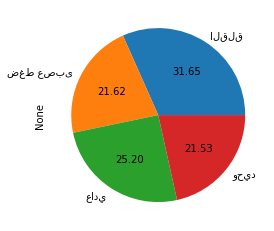

In [6]:
data.groupby('arabic_class').size().plot(kind='pie', autopct='%.2f')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over Entries')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

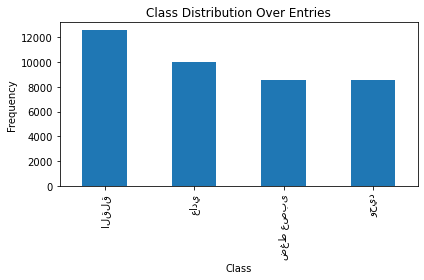

In [7]:
plt.figure()
ax = data['arabic_class'].value_counts().plot(kind='bar')

ax.set_title('Class Distribution Over Entries')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re
# from dsaraby import DSAraby
# ds = DSAraby()
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)
    
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [9]:
# Deal with Hashtags in a string
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

In [10]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
#     text = clean_emoji(text)
    return text

In [11]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
#     ## Remove Emojis
#     text = remove_emoji(text)
    ## Convert text to lowercases
    text = text.lower()
#     ## Arabisy the text
#     text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

data['text_cleaned'] = data['arabic_text'].apply(lambda x:clean_text(x))

In [12]:
data

,tweetcreatedts,arabic_text,arabic_class,arabic_location,text_cleaned
id,,,,,
1039,2021-02-08 19:07:40+00:00,RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد...,القلق,شارع نيشن وود,اريد اقول شكرا جزيلا لكل فرد منكم تواصل معي ف...
1682,2021-02-03 23:58:40+00:00,تضمين التغريدة أنا فقط بحاجة إلى 320! شكرا على...,وحيد,RH في انتظار تحديث الكوكب,تضمين التغريده فقط بحاجه شكرا الفرصه
5275,2021-01-27 23:57:59+00:00,SAD_istfied سأبكي / نقاط البيع,ضغط عصبى,أي ضمائر ¡GMT + 8,سابكي نقاط البيع
6069,2021-02-03 23:58:23+00:00,RTJoshOfficial___: أحتاج إلى رفيق اللعنة الثابت,القلق,........,احتاج رفيق اللعنه الثابت
6087,2021-02-12 20:27:58+00:00,RTmikegolicjr: سعيد لأننا نتحدث أخيرًا عن Desh...,عادي,سانت لويس ، ميزوري,سعيد لاننا نتحدث اخيرا بصوت عال
...,...,...,...,...,...
7813,2021-01-27 23:58:57+00:00,أنا متوتر الرماد لأطير من خلاله,القلق,شارلوت، نك,متوتر الرماد لاطير خلاله
1305,2021-02-03 23:58:58+00:00,64E7B6DA: معرف المعركة\nأحتاج نسخة احتياطية!\n...,وحيد,في,معرف المعركه احتاج نسخه احتياطيه مستوي غريمنير
5192,2021-02-03 23:59:01+00:00,الكثير من المرح ثلج الكتابة عن أيام الثلج لدين...,القلق,دويلستاون ، بنسلفانيا,الكثير المرح ثلج الكتابه ايام الثلج لدينا في م...


In [13]:
### Common word removal
freq = pd.Series(' '.join(data['text_cleaned']).split()).value_counts()[:12]
freq = list(freq.index)
data['text_cleaned2'] = data['text_cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
### Rare words removal
freq = pd.Series(' '.join(data['text_cleaned2']).split()).value_counts()[-50:]
freq = list(freq.index)
data['text_cleaned2'] = data['text_cleaned2'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


In [14]:
data

,tweetcreatedts,arabic_text,arabic_class,arabic_location,text_cleaned,text_cleaned2
id,,,,,,
1039,2021-02-08 19:07:40+00:00,RTmaideeeni: أريد أن أقول شكراً جزيلاً لكل فرد...,القلق,شارع نيشن وود,اريد اقول شكرا جزيلا لكل فرد منكم تواصل معي ف...,اريد اقول شكرا جزيلا لكل فرد منكم تواصل معي لل...
1682,2021-02-03 23:58:40+00:00,تضمين التغريدة أنا فقط بحاجة إلى 320! شكرا على...,وحيد,RH في انتظار تحديث الكوكب,تضمين التغريده فقط بحاجه شكرا الفرصه,تضمين شكرا الفرصه
5275,2021-01-27 23:57:59+00:00,SAD_istfied سأبكي / نقاط البيع,ضغط عصبى,أي ضمائر ¡GMT + 8,سابكي نقاط البيع,سابكي نقاط البيع
6069,2021-02-03 23:58:23+00:00,RTJoshOfficial___: أحتاج إلى رفيق اللعنة الثابت,القلق,........,احتاج رفيق اللعنه الثابت,رفيق اللعنه الثابت
6087,2021-02-12 20:27:58+00:00,RTmikegolicjr: سعيد لأننا نتحدث أخيرًا عن Desh...,عادي,سانت لويس ، ميزوري,سعيد لاننا نتحدث اخيرا بصوت عال,سعيد لاننا نتحدث اخيرا بصوت عال
...,...,...,...,...,...,...
7813,2021-01-27 23:58:57+00:00,أنا متوتر الرماد لأطير من خلاله,القلق,شارلوت، نك,متوتر الرماد لاطير خلاله,متوتر الرماد لاطير خلاله
1305,2021-02-03 23:58:58+00:00,64E7B6DA: معرف المعركة\nأحتاج نسخة احتياطية!\n...,وحيد,في,معرف المعركه احتاج نسخه احتياطيه مستوي غريمنير,معرف المعركه نسخه احتياطيه مستوي غريمنير
5192,2021-02-03 23:59:01+00:00,الكثير من المرح ثلج الكتابة عن أيام الثلج لدين...,القلق,دويلستاون ، بنسلفانيا,الكثير المرح ثلج الكتابه ايام الثلج لدينا في م...,الكثير المرح ثلج الكتابه ايام الثلج لدينا في م...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, min_df =2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(data['text_cleaned2'])
tfidf.shape

(39766, 1000)

In [18]:
X = tfidf
y = data['arabic_class']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


In [20]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

SVC(kernel='linear')

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6874266554903604


In [22]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 6, n_estimators = 1000).fit(X_train, y_train)

#Predict the response for test dataset
y_pred = xgb_model.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\fatma\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7207041072925399
